In [45]:
#!pip install networkx pyvis rdflib ipython numpy matplotlib pygraphviz
#!pip install

In [106]:
import networkx as nx
from pyvis.network import Network
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, XSD
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout


In [95]:
# Crear un grafo RDF
g = Graph()

# Definir los Namespaces
ex = Namespace('http://example.org/')
loc = Namespace('http://example.org/location/')
ent = Namespace('http://example.org/entertainment/')
apt = Namespace('http://example.org/apartment/')
inc = Namespace('http://example.org/incident/')
schema = Namespace('http://schema.org/')
rdf = Namespace('http://www.w3.org/1999/02/22-rdf-syntax-ns#')
rdfs = Namespace('http://www.w3.org/2000/01/rdf-schema#')
xsd = Namespace('http://www.w3.org/2001/XMLSchema#')

# Vinculate Namespaces to graph RDF
g.bind('ex', ex)
g.bind('loc', loc)
g.bind('ent', ent)
g.bind('apt', apt)
g.bind('inc', inc)
g.bind('schema', schema)
g.bind('rdf', rdf)
g.bind('rdfs', rdfs)
g.bind('xsd', xsd)

<Graph identifier=Ne8989c452e05457298a6d867aa5b3e13 (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Define Classes
g.add((loc.Locations, RDF.type, RDFS.Class))
g.add((loc.District, RDF.type, RDFS.Class))
g.add((inc.Incident, RDF.type, RDFS.Class))

# Define Locations subclases
g.add((ent.Entertainment, RDF.type, RDFS.Class))
g.add((ent.Entertainment, RDFS.subClassOf, loc.Locations))

g.add((apt.Apartment, RDF.type, RDFS.Class))
g.add((apt.Apartment, RDFS.subClassOf, loc.Locations))

# Define isinDistrict propiety ----------------
g.add((loc.isinDistrict, RDF.type, RDF.Property))
g.add((loc.Locations, RDFS.domain, loc.isinDistrict))
g.add((loc.isinDistrict, RDFS.range, loc.District))

# Define Longitude propiety
g.add((loc.Longitude, RDF.type, RDF.Property))
g.add((loc.Locations, RDFS.domain, loc.Longitude))
g.add((loc.Longitude, RDFS.range, XSD.float))

# Define Latitude propiety
g.add((loc.Latitude, RDF.type, RDF.Property))
g.add((loc.Locations, RDFS.domain, loc.Latitude))
g.add((loc.Latitude, RDFS.range, XSD.float))

# Define incidentType 
g.add((inc.incidentType, RDF.type, RDF.Property))
g.add((inc.Incident, RDFS.domain, inc.incidentType))
g.add((inc.incidentType, RDFS.range, XSD.string))

# Define happened_at
g.add((inc.happened_at, RDF.type, RDF.Property))
g.add((inc.Incident, RDFS.domain, inc.happened_at))
g.add((inc.happened_at, RDFS.range, loc.District))

- neighbourhood, criminality index, latitude, extra_people, longitude, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, price (x nit), security_deposit, cleaning_fee, guests_included, review_scores_location (0-10), cancellation_policy

- neighbourhood, latitude, longitude, review_scores_location (0-10),


Airbnb Schema Definition

In [ ]:
# Define criminality_index
g.add((inc.criminalityIndex, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.criminalityIndex))
g.add((inc.criminalityIndex, RDFS.range, XSD.float))

# Define extraPeople
g.add((inc.extraPeople, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.extraPeople))
g.add((inc.extraPeople, RDFS.range, XSD.integer))

# Define propertyType
g.add((inc.propertyType, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.propertyType))
g.add((inc.propertyType, RDFS.range, XSD.string))

# Define roomType
g.add((inc.extraPeople, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.roomType))
g.add((inc.roomType, RDFS.range, XSD.string))

# Define accommodates
g.add((inc.accommodates, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.accommodates))
g.add((inc.accommodates, RDFS.range, XSD.integer))

# Define bathrooms
g.add((inc.bathrooms, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.bathrooms))
g.add((inc.bathrooms, RDFS.range, XSD.integer))

# Define bedrooms
g.add((inc.bedrooms, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.bedrooms))
g.add((inc.bedrooms, RDFS.range, XSD.integer))

# Define beds
g.add((inc.beds, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.beds))
g.add((inc.beds, RDFS.range, XSD.integer)) 

# Define bed_type
g.add((inc.bed_type, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.bed_type))
g.add((inc.bed_type, RDFS.range, XSD.integer)) 

# Define price
g.add((inc.price, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.price))
g.add((inc.price, RDFS.range, XSD.integer)) 

# Define securityDeposit
g.add((inc.securityDeposit, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.securityDeposit))
g.add((inc.securityDeposit, RDFS.range, XSD.integer)) 

# Define cleaningFee
g.add((inc.cleaningFee, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.cleaningFee))
g.add((inc.cleaningFee, RDFS.range, XSD.integer)) 

# Define cleaningFee
g.add((inc.cleaningFee, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.cleaningFee))
g.add((inc.cleaningFee, RDFS.range, XSD.integer)) 

# Define guestsIncluded
g.add((inc.guestsIncluded, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.guestsIncluded))
g.add((inc.guestsIncluded, RDFS.range, XSD.integer))  

# Define cancellationPolicy
g.add((inc.cancellationPolicy, RDF.type, RDF.Property))
g.add((inc.Apartment, RDFS.domain, inc.cancellationPolicy))
g.add((inc.cancellationPolicy, RDFS.range, XSD.string))  

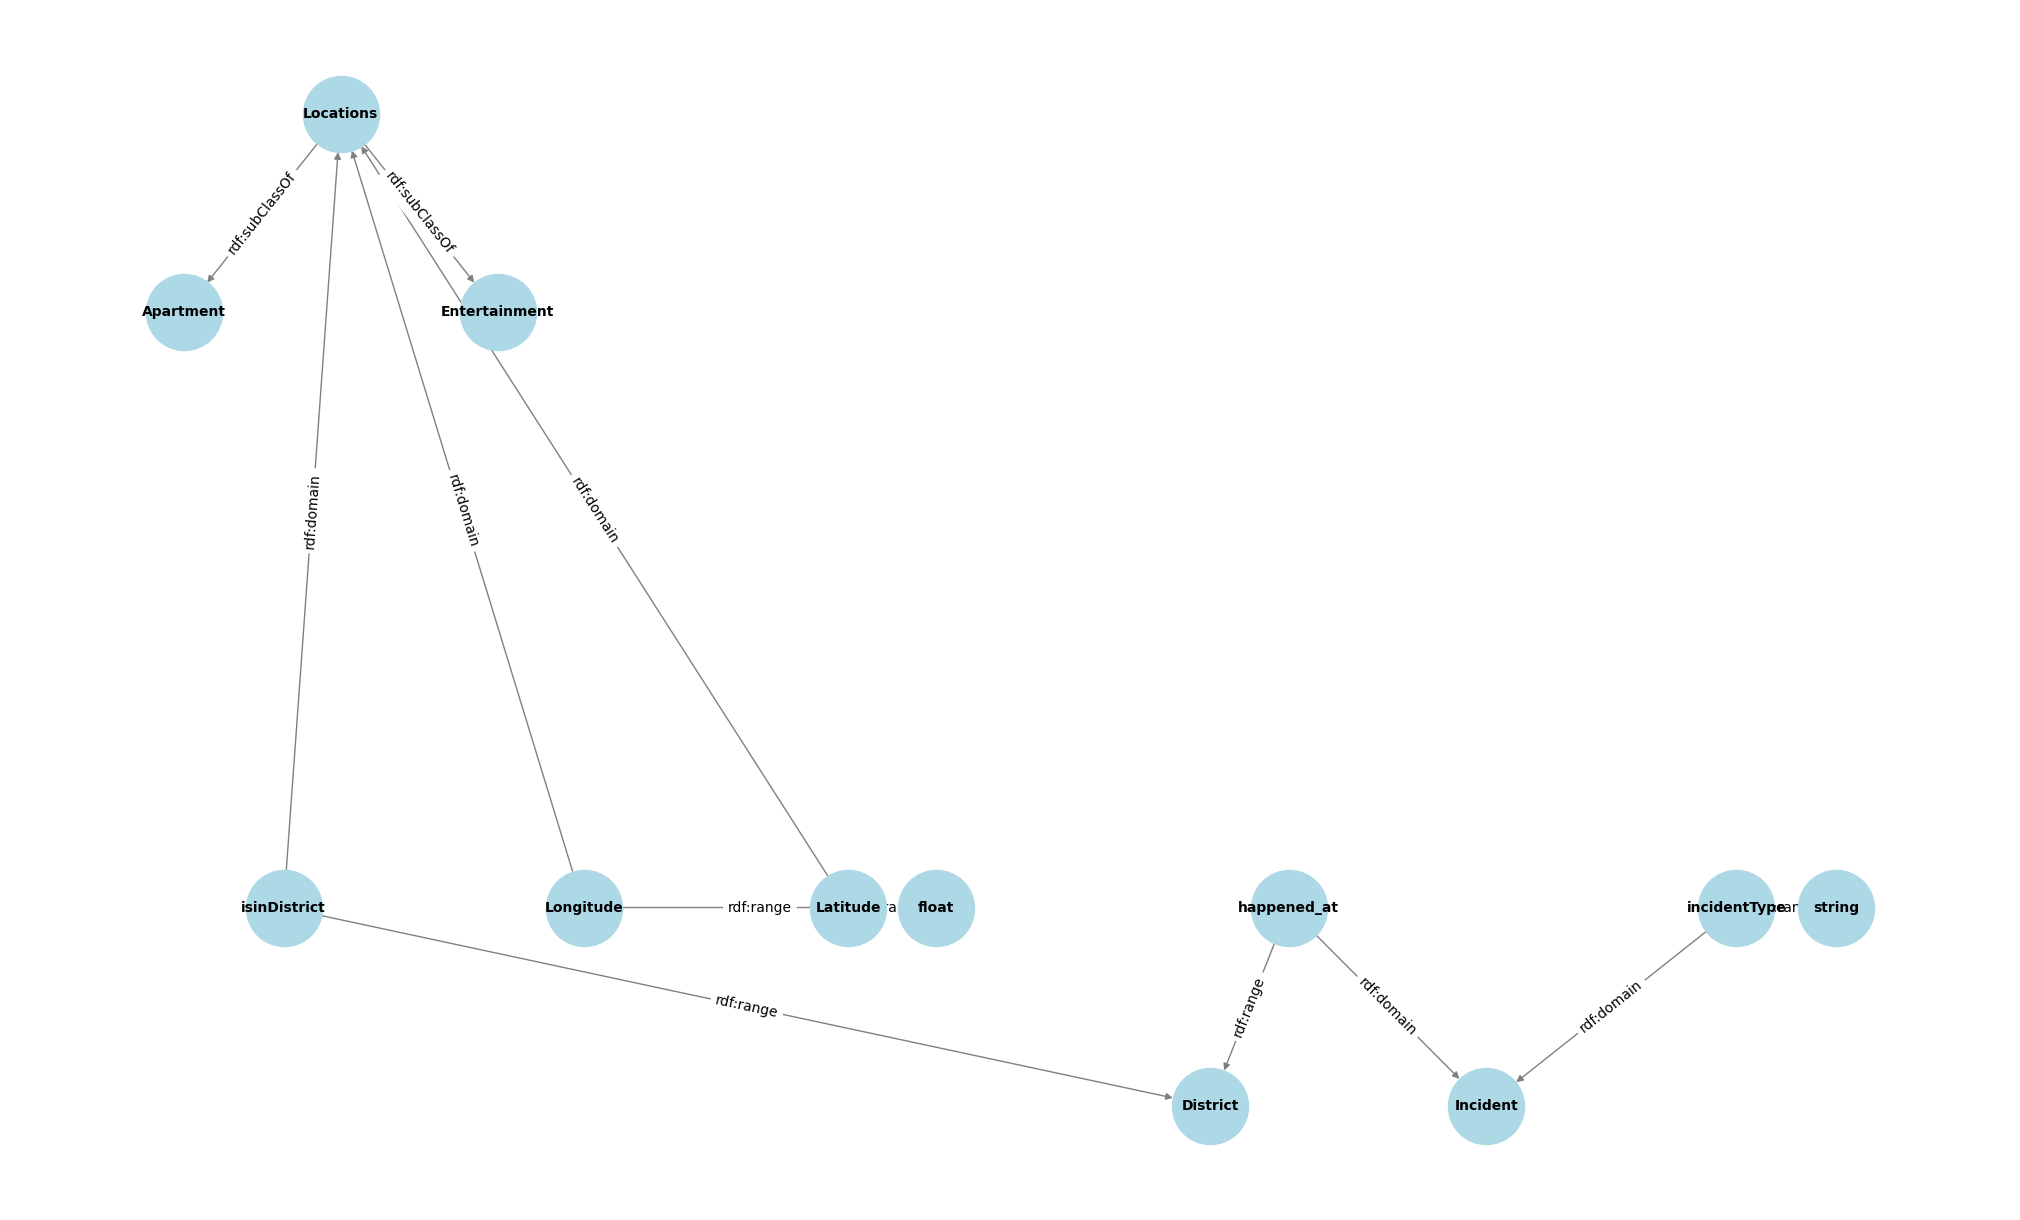

In [137]:
# Crear un grafo NetworkX para la visualización
nx_graph = nx.DiGraph()

# Añadir nodos y aristas al grafo NetworkX basados en el esquema con niveles específicos
for s, p, o in g:
    if p == RDF.type and o == RDFS.Class:
        if str(s).split('/')[-1] == 'Locations':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=1)
        elif str(s).split('/')[-1] in ['Apartment', 'Entertainment']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=2)
        elif str(s).split('/')[-1] in ['Incident', 'District']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=6)
    elif p == RDFS.subClassOf:
        nx_graph.add_edge(o, s, label='rdf:subClassOf')
    elif p == RDFS.domain:
        if str(s).split('/')[-1] in ['isinDistrict', 'Latitude', 'Longitude']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'happened_at':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=5)
        elif str(s).split('/')[-1] == 'incidentType':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=7)
        nx_graph.add_edge(o, s, label='rdf:domain')
    elif p == RDFS.range:
        nx_graph.add_edge(s, o, label='rdf:range')
    elif isinstance(o, Literal):
        literal_label = f'"{o}"^^{o.datatype.split("#")[-1]}'
        nx_graph.add_node(o, label=literal_label, level=10)
        nx_graph.add_edge(s, o, label='rdf:'+str(p).split('/')[-1])

# Asegurarse de que todos los nodos tienen un label y nivel
for n in nx_graph.nodes():
    if 'label' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['label'] = str(n).split('/')[-1].split('#')[-1]
    if 'level' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['level'] = 5

# Generar posiciones de los nodos usando el diseño 'dot'
pos = graphviz_layout(nx_graph, prog='dot')

# Ajustar las posiciones para ordenar niveles descendientes
for node, coords in pos.items():
    level = nx_graph.nodes[node]['level']
    pos[node] = (coords[0], -level)

# Dibujar el grafo usando matplotlib
plt.figure(figsize=(20, 12))
nx.draw(nx_graph, pos, with_labels=True, labels={n: d['label'] for n, d in nx_graph.nodes(data=True)},
        node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)})

# Guardar la imagen en un archivo
plt.savefig("rdf_schema.png", format="PNG")

# Mostrar la imagen en el notebook
plt.show()

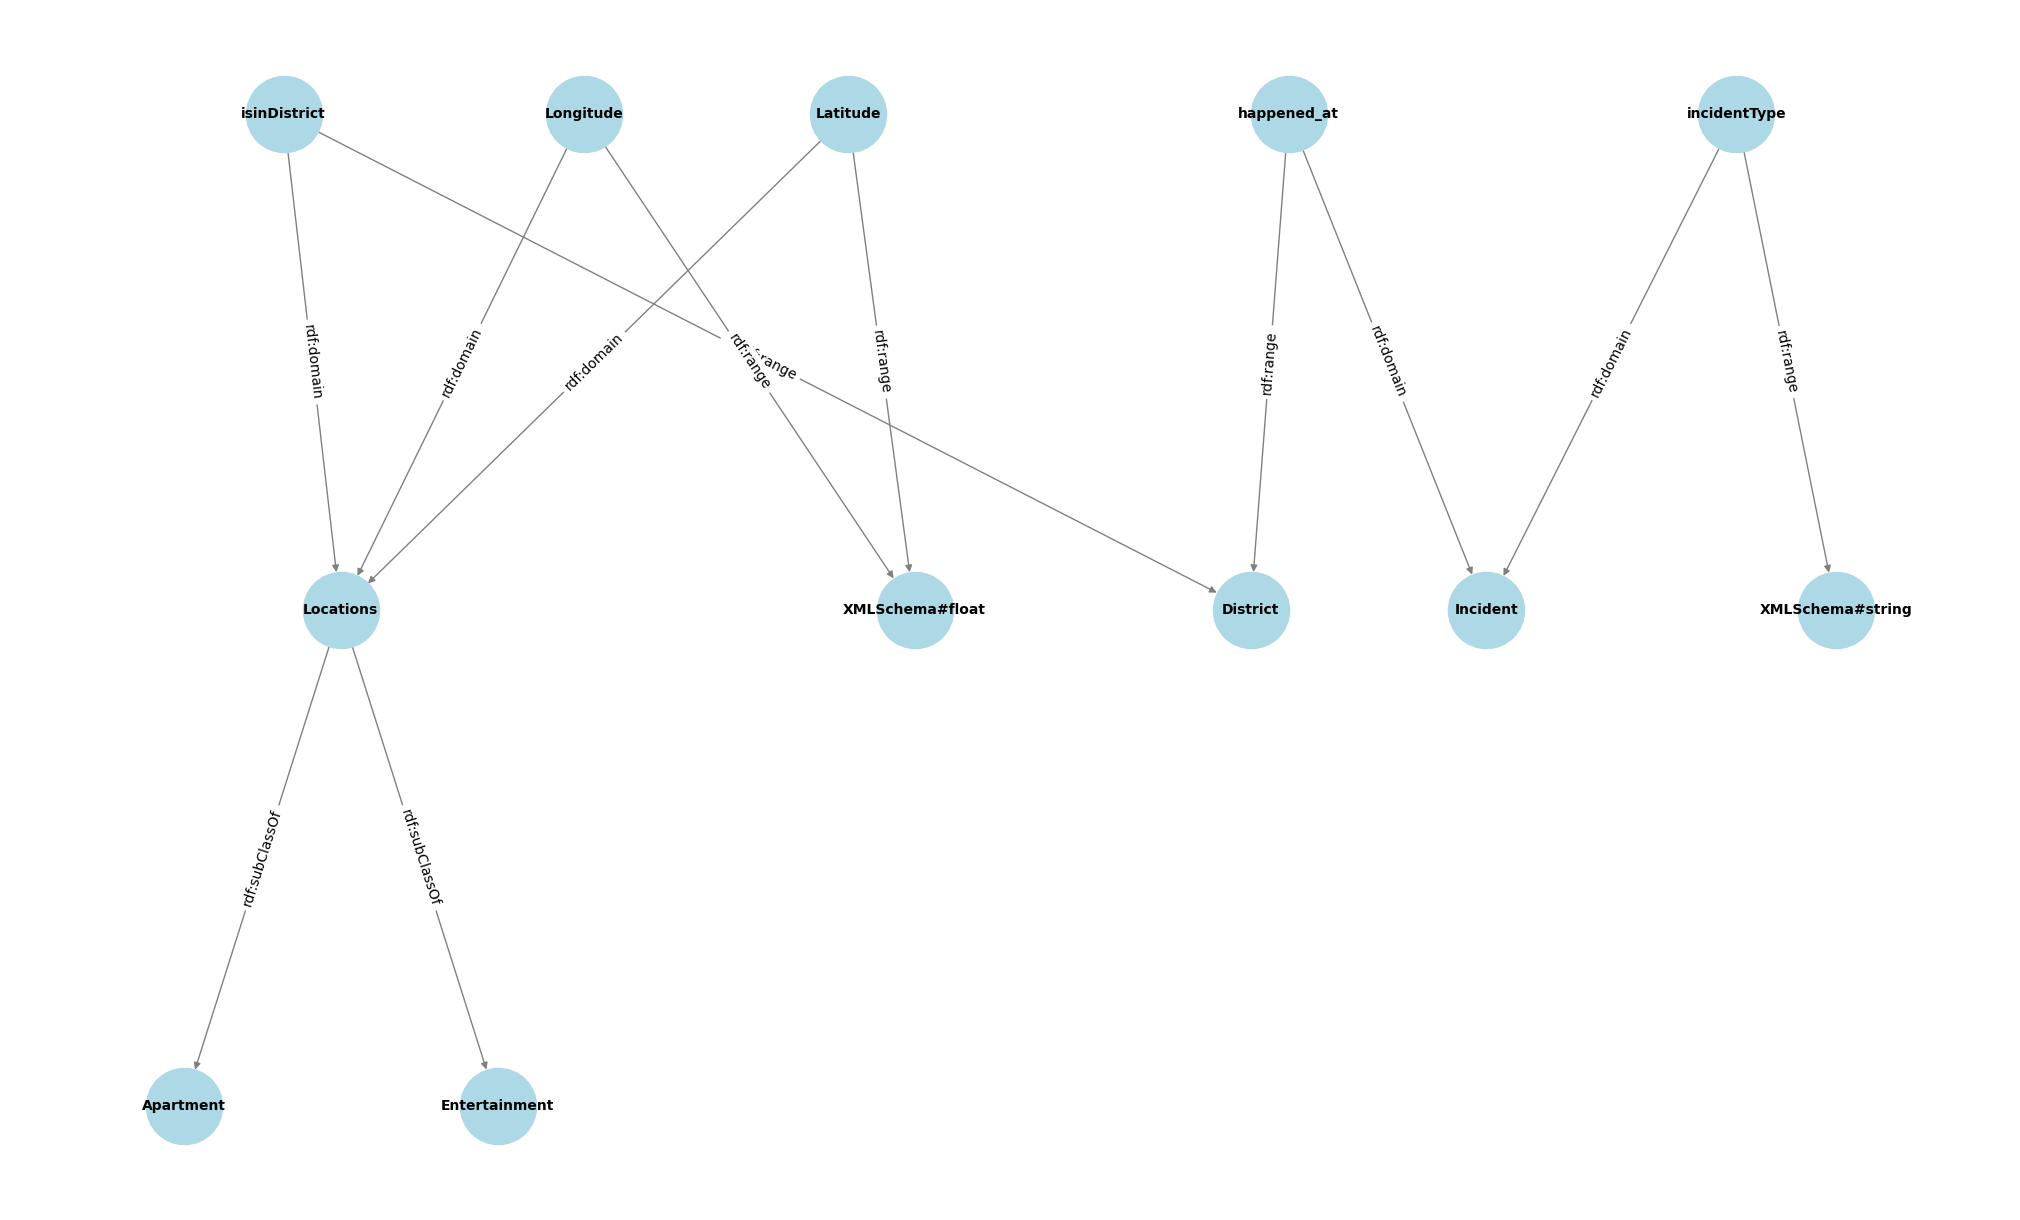

In [123]:
# Crear un grafo NetworkX para la visualización
nx_graph = nx.DiGraph()

# Añadir nodos y aristas al grafo NetworkX basados en el esquema con niveles específicos
for s, p, o in g:
    if p == RDF.type and o == RDFS.Class:
        if str(s).split('/')[-1] == 'Locations':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=1)
        elif str(s).split('/')[-1] in ['Apartment', 'Entertainment']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=2)
        elif str(s).split('/')[-1] == 'District':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'Incident':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=4)
    elif p == RDFS.subClassOf:
        nx_graph.add_edge(o, s, label='rdf:subClassOf')
    elif p == RDFS.domain:
        if str(s).split('/')[-1] in ['isinDistrict', 'Latitude', 'Longitude']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'happened_at':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=4)
        elif str(s).split('/')[-1] == 'incidentType':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=5)
        nx_graph.add_edge(o, s, label='rdf:domain')
    elif p == RDFS.range:
        nx_graph.add_edge(s, o, label='rdf:range')
    elif isinstance(o, Literal):
        literal_label = f'"{o}"^^{o.datatype.split("#")[-1]}'
        nx_graph.add_node(o, label=literal_label, level=5)
        nx_graph.add_edge(s, o, label='rdf:'+str(p).split('/')[-1])

# Asegurarse de que todos los nodos tienen un label y nivel
for n in nx_graph.nodes():
    if 'label' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['label'] = str(n).split('/')[-1]
    if 'level' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['level'] = 5

# Generar posiciones de los nodos usando el diseño 'dot' con menor separación entre niveles
pos = graphviz_layout(nx_graph, prog='dot', args='-Granksep=0.2')

# Dibujar el grafo usando matplotlib
plt.figure(figsize=(20, 12))
nx.draw(nx_graph, pos, with_labels=True, labels={n: d['label'] for n, d in nx_graph.nodes(data=True)},
        node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)})


# Guardar la imagen en un archivo
plt.savefig("rdf_schema_hierarchical_levels_ordered_spaced.png", format="PNG")

# Mostrar la imagen en el notebook
plt.show()

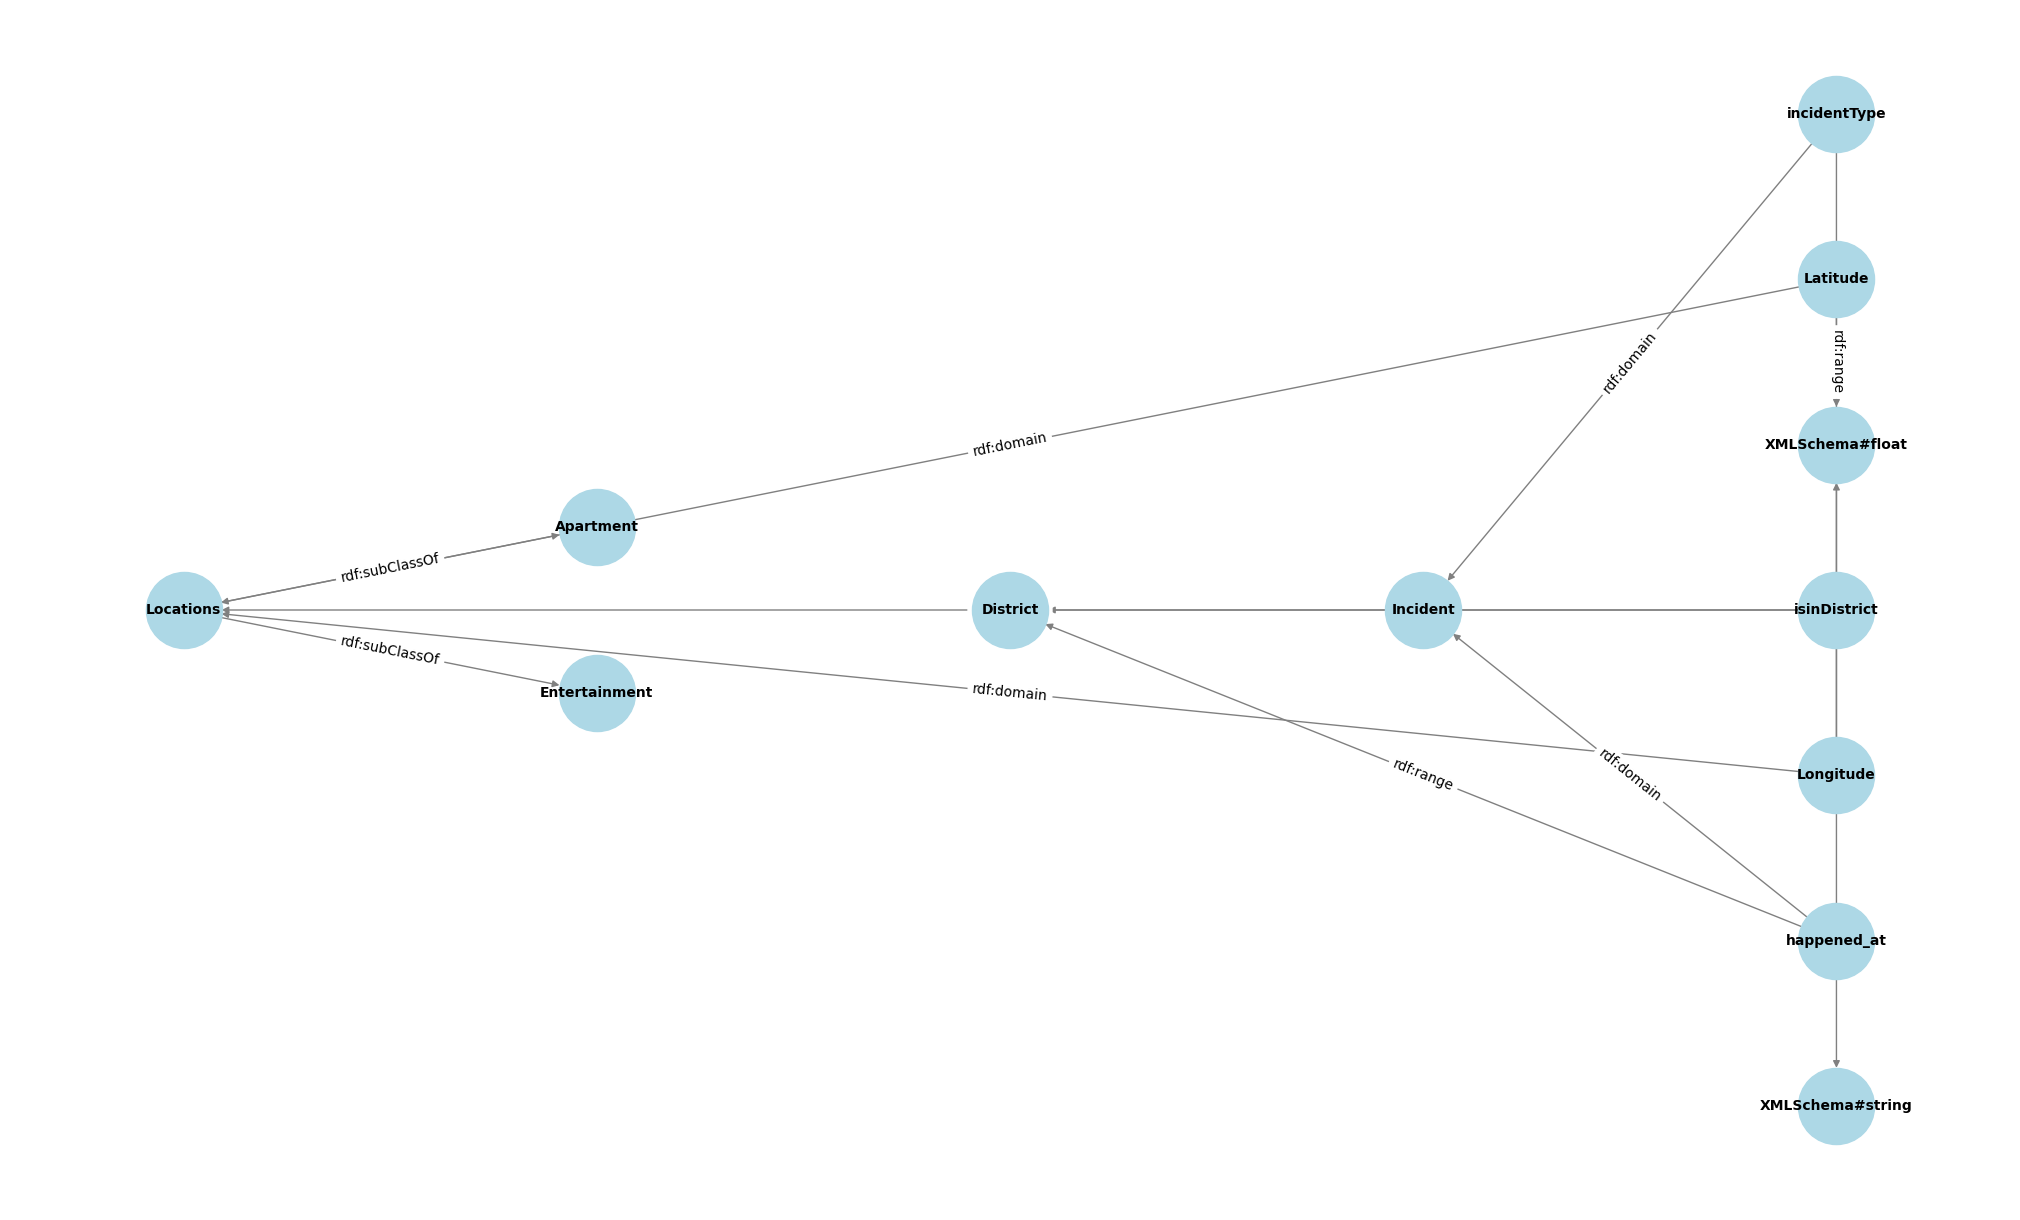

In [103]:
# Crear un grafo NetworkX para la visualización
nx_graph = nx.DiGraph()

# Añadir nodos y aristas al grafo NetworkX basados en el esquema con niveles específicos
for s, p, o in g:
    if p == RDF.type and o == RDFS.Class:
        if str(s).split('/')[-1] == 'Locations':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=1)
        elif str(s).split('/')[-1] in ['Apartment', 'Entertainment']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=2)
        elif str(s).split('/')[-1] == 'District':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=4)
        elif str(s).split('/')[-1] == 'Incident':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=6)
    elif p == RDFS.subClassOf:
        nx_graph.add_edge(o, s, label='rdf:subClassOf')
    elif p == RDFS.domain:
        if str(s).split('/')[-1] in ['isinDistrict', 'Latitude', 'Longitude']:
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=3)
        elif str(s).split('/')[-1] == 'happened_at':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=5)
        elif str(s).split('/')[-1] == 'incidentType':
            nx_graph.add_node(s, label=str(s).split('/')[-1], level=7)
        nx_graph.add_edge(o, s, label='rdf:domain')
    elif p == RDFS.range:
        nx_graph.add_edge(s, o, label='rdf:range')
    elif isinstance(o, Literal):
        literal_label = f'"{o}"^^{o.datatype.split("#")[-1]}'
        nx_graph.add_node(o, label=literal_label, level=7)
        nx_graph.add_edge(s, o, label='rdf:'+str(p).split('/')[-1])

# Asegurarse de que todos los nodos tienen un label y nivel
for n in nx_graph.nodes():
    if 'label' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['label'] = str(n).split('/')[-1]
    if 'level' not in nx_graph.nodes[n]:
        nx_graph.nodes[n]['level'] = 7

# Generar posiciones de los nodos basadas en su nivel
pos = nx.multipartite_layout(nx_graph, subset_key="level", align="vertical")

# Dibujar el grafo usando matplotlib
plt.figure(figsize=(20, 12))
nx.draw(nx_graph, pos, with_labels=True, labels={n: d['label'] for n, d in nx_graph.nodes(data=True)},
        node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)})

# Guardar la imagen en un archivo
plt.savefig("rdf_schema.png", format="PNG")

# Mostrar la imagen en el notebook
plt.show()